# Lab 1: Intro to Remote Sensing and EE

**Purpose**: The purpose of this lab is to enable you to search, find and visualize remotely sensed imagery in Google Earth Engine.  At completion, you should be able to load imagery with the units of interest (radiance or reflectance, for example), make true color and false color composites and identify land cover types based on spectral characteristics.

**Prerequisites**: If you are new to Python or programming, Review the [Earth Engine Code Editor doc and the Get Started guide](https://developers.google.com/earth-engine).




In [1]:
from datetime import date
today = date.today()
d2 = today.strftime("%B %d, %Y")
print("Updated by Alfonso Torres-Rua, ", d2)

Updated by Alfonso Torres-Rua,  February 14, 2020


**Searching (and finding) Landsat imagery**

Landsat is a NASA program that has launched a sequence of Earth observation satellites, named Landsat 1, 2,... etc.  Note that the Landsat program has resulted in the longest continuous observation of the Earth's surface.  In this exercise, you will load a Landsat scene over your area of interest, inspect the units and make a plot of radiance.   Specifically, use imagery from the Landsat 8, the most recent of the sequence of Landsat satellites.  To inspect a Landsat 8 image (also called a scene) in your region of interest (ROI), define your ROI as a point, filter the image collection to get a scene with few clouds, display some information about the image in the console.

In [2]:
# Initializing display and earthengine
from IPython.display import Image
%matplotlib inline

import ee
ee.Initialize()

a) Let's find San Francisco, CA coordinates using the geopy module

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="a.torres@aggiemail.usu.edu") #put your email here
address, (latitude, longitude) = geolocator.geocode("San Francisco")
print(latitude, longitude)

37.7790262 -122.4199061


b) Use the EarthEngine geometry tools to make a point in San Francisco.  
Name the resultant import 'point'

In [4]:
point = ee.Geometry.Point([longitude, latitude])

c) Search for 'Landsat 8 Surface Corrected' here: https://developers.google.com/earth-engine/datasets/catalog/ and get the handle name (e.g. ee.ImageCollection("LANDSAT/LC08/C01/T1_SR"). Name the import 'landsat'.


In [5]:
landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")

d) Filter the ImageCollection by date and location, sort by a image property called 'CLOUD_COVER' and get the first image out of this sorted collection:

All the properties of an satellite is also in the datasets catalog

In [6]:
%%html
<img src='Lab 1 figures/figure1.png', width=700, height=200>

In [7]:
# Note that we need to cast the result of first() to Image.
image = ee.Image(landsat

#    // Filter to get only images in the specified range.This range can be larger
    .filterDate('2019-05-01', '2019-09-30')  # choose a period of no snow

#    // Filter to get only images at the location of the point.This can be a polygon too.
    .filterBounds(point)

#    // Sort the collection by a metadata property.
    .sort('CLOUD_COVER_LAND')

#    // Get the first image out of this collection.
    .first()) #so the less cloudy image

# Get the timestamp and convert it to a date.
julian_date = ee.Date(image.get('system:time_start')).format('DD').getInfo();
year = ee.Date(image.get('system:time_start')).format('Y').getInfo();

print('Julian date: ', julian_date); # ee.Date
print('Year: ', year)

# What properties of this satellite are available?
# properties = image.propertyNames();
# print(properties.getInfo())

Julian date:  267
Year:  2019


The variable "image" now stores a reference to an object of type ee.Image. 

In [8]:
# Print the image band names to the console. Check in GEE website what wavebands these results indicate.
band_names = image.bandNames()
print(band_names.getInfo())

['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11', 'sr_aerosol', 'pixel_qa', 'radsat_qa']


In Landsat 8 Surface Products these bands are also described in the dataset website:


In [9]:
%%html
<img src='Lab 1 figures/figure2.png', width=700, height=200>

In [10]:
# The image requires the scale = 0.0001 as shown above.
image = image.multiply(0.0001)

 Display the image by printing it to the console:

In [11]:
#// Add the image to the map, using the visualization parameters.
url = image.getThumbURL({'dimensions': 500,'bands': ['B4', 'B3', 'B2']}) #dimensions is how wide in jupyter
Image(url=url)

The image is grey because we have not told EarthEngine the min and max values to use. Here is how we define these two characteristics:

In [12]:
#// Define visualization parameters in a dictionary.
# No radiation is represented by zero (min value), and in RGB the average max value is 0.2
trueColor = {
  'dimensions': 500,  
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 0.2,
}

In [13]:
#// Add the image to the map, using the visualization parameters.
url = image.getThumbURL(trueColor)
Image(url=url)

In [14]:
#// Define false-color visualization parameters.# No radiation is represented by zero (min value), 
# for Infrared the average max value is 0.6

falseColor = {
  'dimensions': 500,
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5
}

In [15]:
#// Add the image to the map, using the visualization parameters.
url = image.getThumbURL(falseColor)
Image(url=url)

### Visualizing Landsat imagery

Recall that Landsat 8 measures radiance in multiple spectral bands.  A common way to visualize images is to set the red band to display in red, the green band to display in green and the blue band to display in blue.  This means trying to match the spectral response of the instrument to the spectral response of the photoreceptors in the human eye.  It's not a perfect match.  Despite that, a visualization done in this manner is called a true-color image.  When the display bands don't match human visual perception, the resultant visualization is called a false-color composite.  In this exercise, you will make several different visualizations of the scene you found in exercise 1.  

Add the image found in exercise 1 to the map display with the following code:


In [16]:
#// Hardcode a point in Golden Gate Park.
ggPark = ee.Geometry.Point([-122.4860, 37.7692])

#// Define reflective bands as bands B1-B7.  
reflectiveBands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']


#// See http://landsat.usgs.gov/band_designations_landsat_satellites.php
wavelengths = [0.44, 0.48, 0.56, 0.65, 0.86, 1.61, 2.2];

#// Select only the reflectance bands of interest.
reflectanceImage = image.select(reflectiveBands);

In [17]:
# Sample for values at the point.
scale = 30 # pixel size of image

result = reflectanceImage.reduceRegion(ee.Reducer.mean(), ggPark, scale)
value_info = result.getInfo()

In [18]:
import pandas as pd
df =pd.DataFrame(list(value_info.items()),columns=['Band','Reflectance'])
# # sort bands
df.sort_values('Band', inplace=True) 
# # add wavelenth data to frame
df = df.assign(Wavelength=wavelengths)
df

,Band,Reflectance,Wavelength
0,B1,0.0265,0.44
1,B2,0.0291,0.48
2,B3,0.0552,0.56
3,B4,0.0321,0.65
4,B5,0.4265,0.86
5,B6,0.2275,1.61
6,B7,0.1088,2.20


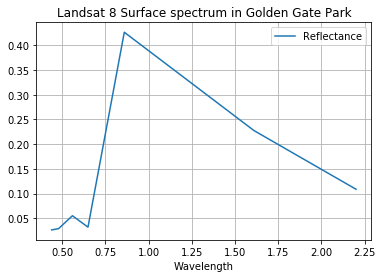

In [19]:
ax =df.plot.line(x='Wavelength', 
             y='Reflectance',
             title= 'Landsat 8 Surface spectrum in Golden Gate Park'
             )
ax.grid()

## Assignment
1. What are the necessary changes to this notebook, to perform the same steps for Utah State University's QUAD? Produce a notebook.

2. Are the Landsat 8 spectrum in Golden Gate Park and the QUAD the same? What are the reasons for the difference?

3. Add to your USU Quad analysis, the following band combinations as presented in the first table of this link [https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/](https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/) What are the differences of each combination against the ones shown in this notebook? Here is another link just for reference [https://gisgeography.com/landsat-8-bands-combinations/](https://gisgeography.com/landsat-8-bands-combinations/)

PS: If you look into table 2 of the first link, you will see how the numeration of bands of Landsat 7 aligns with Landsat 8.

Happy coding!